In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
train.dtypes


ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [5]:
test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [6]:
train.shape,test.shape

((31647, 18), (13564, 17))

In [7]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


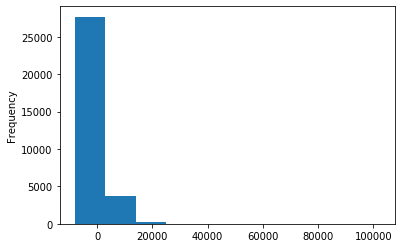

In [8]:
train['balance'].plot.hist()

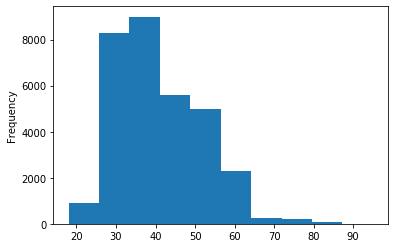

In [9]:
train['age'].plot.hist()

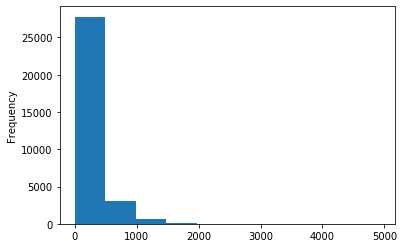

In [10]:
train['duration'].plot.hist()

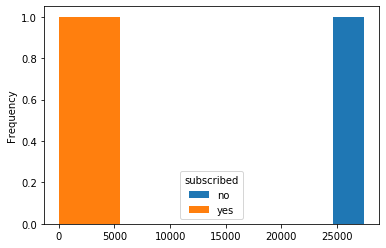

In [11]:
pd.crosstab(train['default'],train['subscribed']).plot.hist()


In [12]:
train.columns


Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [13]:
corr=train[['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed']].corr()

In [14]:
print(corr)

                ID       age   balance       day  duration  campaign  \
ID        1.000000  0.013337  0.067897 -0.063399  0.007183 -0.103508   
age       0.013337  1.000000  0.103245 -0.011056 -0.003870  0.005733   
balance   0.067897  0.103245  1.000000  0.003461  0.024274 -0.012032   
day      -0.063399 -0.011056  0.003461  1.000000 -0.032288  0.159168   
duration  0.007183 -0.003870  0.024274 -0.032288  1.000000 -0.080305   
campaign -0.103508  0.005733 -0.012032  0.159168 -0.080305  1.000000   
pdays     0.436148 -0.021947  0.001789 -0.087626  0.000529 -0.087570   
previous  0.254476  0.005761  0.013843 -0.048752  0.001783 -0.033151   

             pdays  previous  
ID        0.436148  0.254476  
age      -0.021947  0.005761  
balance   0.001789  0.013843  
day      -0.087626 -0.048752  
duration  0.000529  0.001783  
campaign -0.087570 -0.033151  
pdays     1.000000  0.428938  
previous  0.428938  1.000000  


In [15]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [16]:
test.isnull().sum()


ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [17]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [18]:
#training and validation datasets
training=train[:29000]
validation=train[29000:]

In [19]:
training.shape,validation.shape

((29000, 18), (2647, 18))

In [20]:
#ID is a random value and hence is omitted
x_train=training.drop(['ID','subscribed'],axis=1)
y_train=training['subscribed']
x_val=training.drop(['ID','subscribed'],axis=1)
y_val=training['subscribed']


In [21]:
x_train=pd.get_dummies(x_train)
x_val=pd.get_dummies(x_val)
#training.fillna(0,inplace=True)
from sklearn.linear_model import LogisticRegression

In [22]:
logreg=LogisticRegression()

In [23]:
logreg.fit(x_train,y_train)

C:\Users\anton\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
pred=logreg.predict(x_val)

In [25]:
pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [26]:
logreg.score(x_val,y_val)

0.9008275862068965

In [27]:
x_test=test.drop(['ID'],axis=1)
x_test=pd.get_dummies(x_test)


In [28]:
pred=logreg.predict(x_test)

In [29]:
pred

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

In [30]:
submit=pd.DataFrame()

In [31]:
#submit['ID'] = test['ID']
submit['subscribed'] = pred

In [32]:
submit.to_csv('submission.csv', header=True, index=False)